In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Read in data

In [2]:
all_data = pd.read_csv("../Data/Train_and_Validate_EEG.csv", index_col=0).drop("Unnamed: 122",axis=1)
all_data

,sex,age,eeg.date,education,IQ,main.disorder,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
ID,,,,,,,,,,,,,,,,,,,,,
1,F,31.55,2016.4.7,16.0,103.0,Mood disorder,Depressive disorder,48.843890,46.533704,25.924618,...,84.825697,62.094883,49.639937,61.347225,81.630630,39.464753,72.168580,30.893891,74.038603,51.237679
2,M,25.00,2018.3.23,16.0,115.0,Healthy control,Healthy control,34.108015,22.838567,20.646824,...,77.398455,48.282117,73.185133,66.742485,49.466312,59.270167,66.639938,40.297206,55.547526,63.630547
3,M,26.20,2015.4.10,16.0,83.0,Schizophrenia,Schizophrenia,31.084064,28.212342,30.467865,...,91.510025,51.974239,62.571143,75.509166,56.460421,64.001966,78.424703,53.494830,66.581021,80.202968
4,M,21.00,2016.5.13,15.0,NaN,Obsessive compulsive disorder,Obsessive compulsitve disorder,14.310468,13.947459,10.761600,...,79.855172,42.420095,56.473788,54.241183,69.561898,41.384408,66.332780,30.034691,65.659003,54.662177
5,F,28.15,2018.7.14,18.0,101.0,Healthy control,Healthy control,21.763093,23.938428,19.517805,...,38.160508,21.319727,32.967416,33.401386,37.406879,27.080760,39.050046,14.826695,32.285940,41.015604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,M,19.23,2017.9.15,12.0,79.0,Schizophrenia,Schizophrenia,22.432700,22.799740,16.881976,...,70.625220,59.330855,56.657348,61.684146,81.194932,60.868446,76.268561,53.096066,82.856007,72.506823
942,M,37.14,2011.6.13,14.0,97.0,Trauma and stress related disorder,Posttraumatic stress disorder,12.887332,14.295926,13.959261,...,80.159305,34.496443,45.412377,49.901553,62.663935,41.000232,69.587211,23.529430,72.031307,54.297598
943,M,20.08,2017.1.11,12.0,93.0,Mood disorder,Depressive disorder,20.055370,11.734445,15.719485,...,84.826939,64.134452,75.336179,76.576526,74.856292,68.741795,79.043187,62.032961,79.282698,80.363086


### Parse data column names

In [3]:
bands = ['gamma', 'highbeta', 'beta', 'alpha', 'theta', 'delta']
AB_per_band = {}
AB_cols = []
COH_per_band = {}
COH_cols = []

for band in bands:
    AB_per_band[band] = []
    COH_per_band[band] = []

for col_name in all_data.columns:
    col_split = col_name.split('.')
    if col_split[0] == 'AB':
        AB_per_band[col_split[2]].append(col_name)
        AB_cols.append(col_name)
    elif col_split[0] == 'COH':
        COH_per_band[col_split[2]].append(col_name)
        COH_cols.append(col_name)

In [4]:
electrodes = set()
for col in COH_cols:
    col_split = col.split('.')
    # elec1 = col_split[4]
    electrodes.add(col_split[3]+'.'+col_split[4])
    # elec2 = col_split[6]
    electrodes.add(col_split[5]+'.'+col_split[6])

electrodes = list(electrodes)
electrodes.sort()
len(electrodes)

19

In [5]:
def get_dfs(data, bands):
    AB_dfs = {}
    COH_dfs = {}

    for band in bands:
        AB_dfs[band] = []
        COH_dfs[band] = []

        for _ in AB_per_band:
            AB_dfs[band] = data[AB_per_band[band]]

            COH_dfs[band] = data[COH_per_band[band]]

    return AB_dfs, COH_dfs

In [6]:
AB_dfs, COH_dfs = get_dfs(all_data, bands)

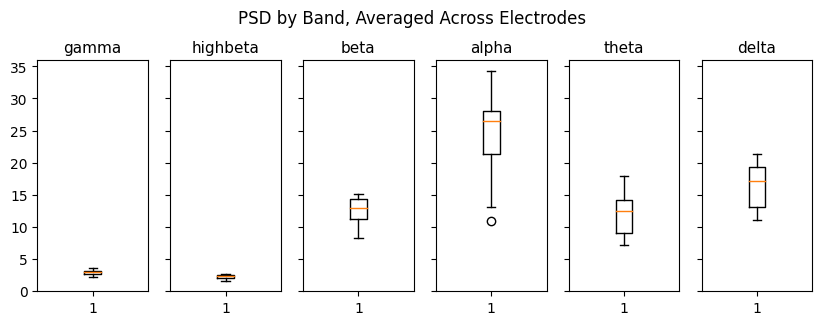

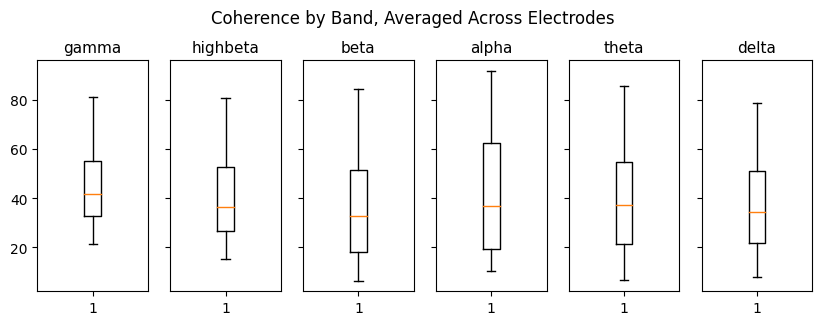

In [7]:
fig, ax = plt.subplots(1, 6,sharey=True, figsize=(10, 3))
for idx in range(len(bands)):
    ax[idx].boxplot(AB_dfs[bands[idx]].mean())
    ax[idx].set_title(bands[idx],fontsize=11)
fig.suptitle('PSD by Band, Averaged Across Electrodes',y=1.05)
plt.show()

fig, ax = plt.subplots(1, 6,sharey=True, figsize=(10, 3))
for idx in range(len(bands)):
    ax[idx].boxplot(COH_dfs[bands[idx]].mean())
    ax[idx].set_title(bands[idx],fontsize=11)
fig.suptitle('Coherence by Band, Averaged Across Electrodes', y=1.05)
plt.show()

In [8]:
AB_dfs2 = []
COH_dfs2 = []

for band in bands:
    AB_dfs2.append(pd.DataFrame(AB_dfs[band].mean()).rename({0:band},axis=1).reset_index(drop=True))
    COH_dfs2.append(pd.DataFrame(COH_dfs[band].mean()).rename({0:band},axis=1).reset_index(drop=True))

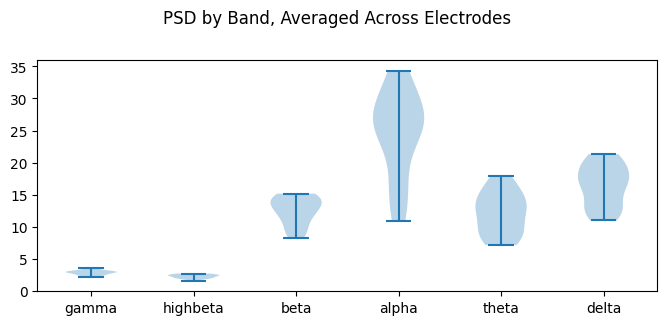

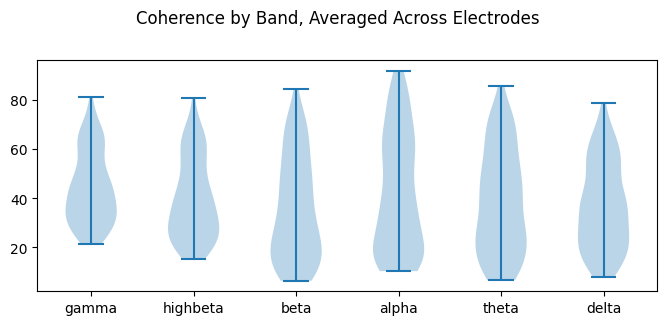

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.violinplot(pd.DataFrame(pd.concat(AB_dfs2,axis=1)))
# ax.set_title(bands[idx],fontsize=11)
fig.suptitle('PSD by Band, Averaged Across Electrodes',y=1.05)
ax.set_xticks([y + 1 for y in range(len(bands))],
                  labels=bands)
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.violinplot(pd.DataFrame(pd.concat(COH_dfs2,axis=1)))
# ax.set_title(bands[idx],fontsize=11)
fig.suptitle('Coherence by Band, Averaged Across Electrodes', y=1.05)
ax.set_xticks([y + 1 for y in range(len(bands))],
                  labels=bands)
plt.show()